#  Investigate Gapminder Data sets


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


## Importing libraries used in the notebook

In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

## Data Wrangling
#### Reading Data files

In [121]:
## data used for the first question
life_exp  = pd.read_csv('life_expectancy_years.csv')
fertility = pd.read_csv('total_fertility.csv')

## data used for the second Question

males_out_of_schools = pd.read_csv('children_out_of_school_primary_male.csv')
females_out_of_schools = pd.read_csv('children_out_of_school_primary_female.csv')


## data used for the third Question

breast_cancer = pd.read_csv('breast_cancer_number_of_female_deaths.csv')


# Cleaning data & dropping null values

In [122]:
life_exp = life_exp.dropna()
fertility = fertility.dropna()


In [123]:
females_out_of_schools.fillna(females_out_of_schools.mean(),inplace= True)
males_out_of_schools.fillna(males_out_of_schools.mean(),inplace= True)



# Reshaping data

    Reshaping data to be able to compare indicators, using "melt" method and creating new columns country and year

In [124]:
life_exp =life_exp.melt(id_vars = ['country'], var_name = 'year', value_name = 'life_exp').sort_values(by = 'country').reset_index(drop=True)
fertility = fertility.melt(id_vars = ['country'], var_name = 'year', value_name = 'fertility').sort_values(by = 'country').reset_index(drop=True)
females_out_of_schools =females_out_of_schools.melt(id_vars = ['country'], var_name = 'year', value_name = 'females_out').sort_values(by = 'country').reset_index(drop=True)
males_out_of_schools = males_out_of_schools.melt(id_vars = ['country'], var_name = 'year', value_name = 'males_out').sort_values(by = 'country').reset_index(drop=True)

breast_cancer = breast_cancer.melt(id_vars = ['country'], var_name = 'year', value_name = 'breast_cancer_deaths').sort_values(by = 'country').reset_index(drop=True)

# Merging Data sets:
    using "Merge" method, on 'country'&'year' columns to combare indicators


In [125]:
data = pd.merge(life_exp,fertility, on = ['country','year'] , how ='left')
data = pd.merge(data,females_out_of_schools, on = ['country','year'] , how ='left')
data = pd.merge(data,males_out_of_schools, on = ['country','year'] , how ='left')

data.head()

,country,year,life_exp,fertility,females_out,males_out
0,Afghanistan,1800,28.2,7.00,NaN,NaN
1,Afghanistan,2051,71.0,2.10,NaN,NaN
2,Afghanistan,1850,27.7,7.00,NaN,NaN
3,Afghanistan,2050,70.8,2.13,NaN,NaN
4,Afghanistan,1851,27.7,7.00,NaN,NaN


# For the first Question:     
    I choosed invistigating life expectancy and fertility before,during & after the first world war
> **life_exp:** describes the average number of years a newborn child would live if the current mortality patterns were the same.

>**fertility:** describes total fertility rate. the number of children that would be born to each woman.


## Investigating data during the first World War 

In [126]:
before_war=['1909','1910', '1911','1912','1913']
during_war= ['1914','1915','1916','1917','1918']
after_war=['1919', '1920','1921','1922','1923']
powers = ['France','Russia', 'Japan','United Kingdom','Serbia','Italy','Germany' , 'Austria','Turkey']

## before war data fiteration

filt = data['country'].isin(powers)
war_data = data.loc[filt]
filt_ = war_data['year'].isin(before_war)
before_war_data = war_data.loc[filt_]

### during war data fiteration

filt_ = war_data['year'].isin(during_war) 
during_war_data=war_data.loc[filt_]

### After war data fiteration
filt_ = war_data['year'].isin(after_war) 
after_war_data=war_data.loc[filt_]


## Before war data visualisation

In [127]:
countries = war_data['country'].unique()
xpos = np.arange(len(countries))

life_exp_mean = before_war_data.groupby('country')['life_exp'].mean()
fertility_mean = before_war_data.groupby('country')['fertility'].mean()
print(life_exp_mean)
print(fertility_mean)


country
Austria           45.12
France            50.56
Germany           49.04
Italy             46.74
Japan             40.32
Russia            33.54
Serbia            35.60
Turkey            35.96
United Kingdom    53.26
Name: life_exp, dtype: float64
country
Austria           3.564
France            2.510
Germany           3.848
Italy             4.356
Japan             5.102
Russia            7.104
Serbia            5.166
Turkey            6.856
United Kingdom    2.962
Name: fertility, dtype: float64


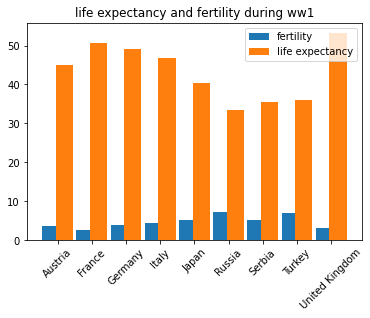

In [128]:
plt.xticks(xpos ,countries,rotation=45)
plt.title('life expectancy and fertility during ww1')
plt.bar(xpos-.2, fertility_mean ,width = 0.5, label = 'fertility')
plt.bar(xpos+.2, life_exp_mean ,width = 0.5, label = 'life expectancy')
plt.legend()

## During war data visualisation

In [129]:
life_exp_mean = during_war_data.groupby('country')['life_exp'].mean()
fertility_mean = during_war_data.groupby('country')['fertility'].mean()
print(life_exp_mean)
print(fertility_mean)

country
Austria           44.680
France            38.040
Germany           39.780
Italy             38.960
Japan             39.500
Russia            29.600
Serbia            18.468
Turkey            19.402
United Kingdom    46.760
Name: life_exp, dtype: float64
country
Austria           2.940
France            1.598
Germany           2.764
Italy             3.560
Japan             4.962
Russia            5.240
Serbia            4.964
Turkey            6.828
United Kingdom    2.440
Name: fertility, dtype: float64


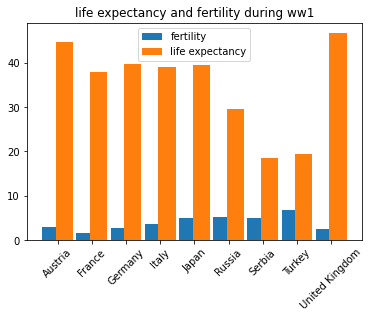

In [130]:
xpos = np.arange(len(countries))
plt.title('life expectancy and fertility during ww1')
plt.xticks(xpos ,countries,rotation=45)
plt.bar(xpos-.2, fertility_mean ,width = 0.5, label = 'fertility')
plt.bar(xpos+.2, life_exp_mean ,width = 0.5, label = 'life expectancy')
plt.legend()

## After war data visualisation

In [131]:
life_exp_mean = after_war_data.groupby('country')['life_exp'].mean()
fertility_mean = after_war_data.groupby('country')['fertility'].mean()
print(life_exp_mean)
print(fertility_mean)


country
Austria           50.86
France            52.36
Germany           53.82
Italy             47.64
Japan             42.58
Russia            25.52
Serbia            36.60
Turkey            32.30
United Kingdom    57.10
Name: life_exp, dtype: float64
country
Austria           3.038
France            2.342
Germany           2.476
Italy             3.572
Japan             5.144
Russia            5.472
Serbia            4.746
Turkey            6.798
United Kingdom    2.580
Name: fertility, dtype: float64


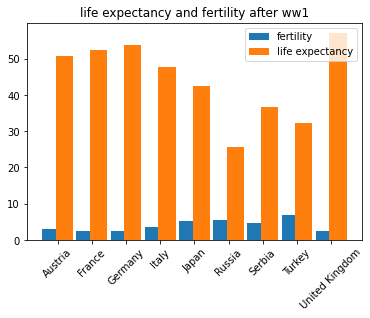

In [132]:
plt.xticks(xpos ,countries,rotation=45)
plt.title('life expectancy and fertility after ww1')
plt.bar(xpos-.2, fertility_mean ,width = 0.5, label = 'fertility')
plt.bar(xpos+.2, life_exp_mean ,width = 0.5, label = 'life expectancy')
plt.legend()

## Conclusions:

From visualization we can see:
  >**Serbia** for example suffered from tremendous casualities during the first world war, and we can see this in the graphs:
    1. Before war it had life expectancy average between 30 and 40 years
    2. During the war it dropped between 10 and 20
    3. back to normal

# Second Question 

## Investigating boys vs. girls out of schools in the last decade in some African countries


In [177]:
years = ['2008','2009','2010','2010','2011','2012','2012','2013','2014','2015','2016','2017','2018']
countries = ['Nigeria','Ethiopia','Egypt','South Africa','Kenya'
             ,'Uganda','Algeria','Sudan','Morocco'
             ,'Angola','Ghana','Tunisia','Somalia',
            'Botswana' ,'Burundi', 'Namibia','Niger', 'Zambia',
            'Zimbabwe','Tanzania','Libya']


## Dropping not used coloumns
Last_decade_data= data.drop(['life_exp','fertility'],axis = 1)



In [178]:
# filtering data 
filt_ = Last_decade_data['year'].isin(years)
Last_decade_data = Last_decade_data.loc[filt_]
filt=Last_decade_data['country'].isin(countries)
Last_decade_data = Last_decade_data[filt]
Last_decade_data.sort_values(by='year')

,country,year,females_out,males_out
19238,Ghana,2008,2.830000e+05,3.050000e+05
44632,Somalia,2008,2.173290e+05,1.953555e+05
14987,Egypt,2008,2.173290e+05,1.953555e+05
36007,Nigeria,2008,4.870000e+06,3.470000e+06
45014,South Africa,2008,2.173290e+05,1.953555e+05
...,...,...,...,...
35863,Nigeria,2018,1.905210e+05,1.444750e+05
6495,Botswana,2018,1.905210e+05,1.444750e+05
48997,Tanzania,2018,8.420000e+05,1.050000e+06
54815,Zambia,2018,1.905210e+05,1.444750e+05


In [179]:
female_mean = Last_decade_data.groupby('country')['females_out'].mean()
male_mean = Last_decade_data.groupby('country')['males_out'].mean()


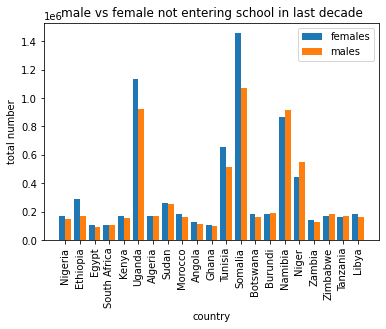

In [180]:
plt.title('male vs female not entering school in last decade')
plt.xlabel('country')
plt.ylabel('total number')
xpos = np.arange(len(countries))
plt.xticks(xpos ,countries, rotation = 90)
plt.bar(xpos-.2,female_mean ,width = 0.4, label = 'females')
plt.bar(xpos+.2,male_mean ,width = 0.4, label = 'males')
plt.legend()


## Conclusion:


> it's noticed that Ugandantunisia,Somalia and Sudan are in the  top with majority of females in africa

>Nambia and Niger has majority of males over females not sent to school 

# Third Question 

## Questioning about the evolution of breast cancer starting from 2000 and which country have the biggest numbers of deaths since then:

In [181]:
years = ['2000','2001','2002','2003','2004','2005','2006','2007'
         ,'2008','2009','2010','2010','2011','2012','2012','2013','2014','2015','2016']


In [184]:
filt_ = breast_cancer['year'].isin(years)
breast_cancer = breast_cancer.loc[filt_]
filt = breast_cancer['country'].isin(countries)
breast_cancer = breast_cancer[filt]

deaths_mean = breast_cancer.groupby('country')['breast_cancer_deaths'].mean()
deaths_mean

country
Algeria         1761.176471
Angola           826.294118
Egypt           2865.882353
Ethiopia        3210.588235
Ghana            857.000000
Kenya            687.705882
Morocco         2520.000000
Nigeria         9711.764706
Somalia          482.294118
South Africa    3362.352941
Sudan           1472.352941
Tunisia          842.705882
Uganda          1555.882353
Name: breast_cancer_deaths, dtype: float64

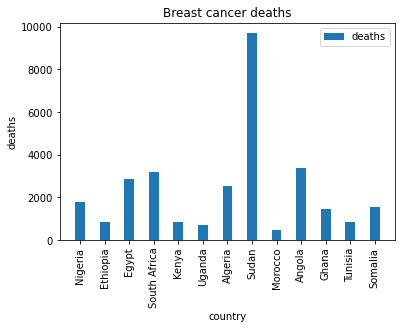

In [185]:
plt.title('Breast cancer deaths')
plt.xlabel('country')
plt.ylabel('deaths')
xpos = np.arange(13)
plt.xticks(xpos ,countries, rotation = 90)
plt.bar(xpos, deaths_mean ,width = 0.4, label = 'deaths')
plt.legend()

## Conclusion:
    found that sudan has the greatest number of deathsin Africa in the  interval 2000 -2016